# Example of using handy module ..FIXME
## Useful stuff related to time, and time analysis

In [5]:
import sys
sys.path.insert(0, '../modules')
import handy as hd

In [27]:
import pandas as pd, numpy as np
import os
import matplotlib.pyplot as plt
# Remove the most annoying pandas warning
# A value is trying to be set on a copy of a slice from a DataFrame.
pd.options.mode.chained_assignment = None

data_dir = '../../data'
src_file = 'sample02.csv'

f = os.path.join(data_dir, src_file)

In [7]:
df = pd.read_csv(f, encoding='latin_1', sep = ';', error_bad_lines=False)

# useful auxiliary columns

In [8]:
%time df['created'] = pd.to_datetime(df['created'], format = hd.format_dash, errors = 'coerce')

Wall time: 37.8 ms


In [9]:
%time df['resolved'] = pd.to_datetime(df['resolved'], format = hd.format_dash, errors = 'coerce')

Wall time: 37.8 ms


In [10]:
from importlib import reload
reload(hd)

<module 'handy' from '../modules\\handy.py'>

In [11]:
df = hd.augment_columns(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   created   37835 non-null  datetime64[ns] 
 1   resolved  37834 non-null  datetime64[ns] 
 2   category  37835 non-null  object         
 3   priority  37835 non-null  object         
 4   delta     37834 non-null  timedelta64[ns]
 5   delta_m   37834 non-null  float64        
 6   tod       37835 non-null  float64        
 7   weekday   37835 non-null  int64          
 8   hour      37835 non-null  int64          
 9   tow       37835 non-null  float64        
 10  weekhour  37835 non-null  float64        
 11  day_nr    37835 non-null  int64          
 12  week_nr   37835 non-null  int64          
dtypes: datetime64[ns](2), float64(4), int64(4), object(2), timedelta64[ns](1)
memory usage: 3.8+ MB


In [22]:
# basic characteristics of data

start, end = pd.to_datetime('2019-01-01'), pd.to_datetime('2019-12-31')
#df.created.min(), df.created.max()
days = (end - start).days
weeks = days / 7
print('start:\t{}\nend:\t{}'.format(start, end))
print('number of records:\t{}'.format(len(df)))
print('days: {}\trecords per day:{:.1f}'.format(days, len(df) / days))
print('weeks: {:.1f}\trecords per week:{:.1f}'.format( weeks, len(df) / weeks))

start:	2019-01-01 00:00:00
end:	2019-12-31 00:00:00
number of records:	37001
days: 364	records per day:101.7
weeks: 52.0	records per week:711.6


In [23]:
# how to delimit time-wise
df = df[df.created < pd.Timestamp('2021-02-01 00:00:00')]

In [24]:
df0 = df.copy()

# week hour

In [25]:
import seaborn as sns
sns.set()
df = df0.copy()
df.shape

(37001, 13)

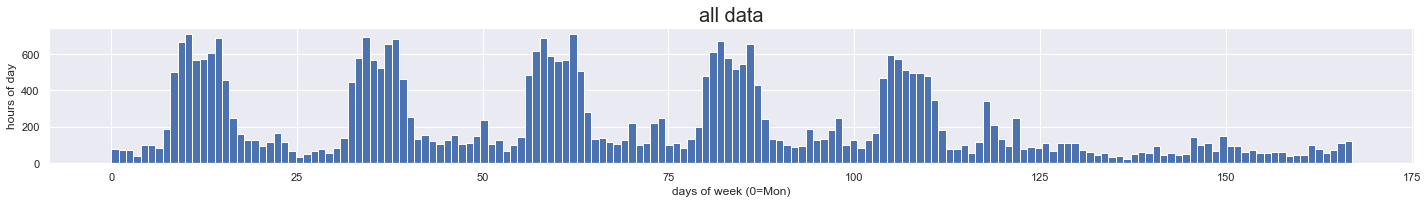

In [26]:
fig, ax  = plt.subplots(1, 1, figsize=(20,3))
axis = ax

axis.hist(df.weekhour, bins = 24 * 7)
axis.set_xlabel('days of week (0=Mon)')
axis.set_ylabel('hours of day')
axis.set_title("all data", fontsize = 20)#, fontsize=16, y=0.94)


plt.tight_layout()